<h1 align="center">El problema del camino aleatorio.</h1>
<div align="right">David A. Miranda, PhD<br>2021</div>

## 1. Cargar librerías

In [10]:
import numpy as np 
import matplotlib.pyplot as plt 

## 2. Distancia recorrida en el problema de camino aleatorio 2D
### 2.1. Método para obtener recorrido y graficar

In [2]:
def camino_aleatorio(num_pasos=100, dist_paso=0.5, theta=-45, x0=0, y0=0, plot=True, dpi=300):
    n = np.random.rand(num_pasos)
    ps = np.ones(num_pasos)
    ps[n < 0.5] = 0
    theta0 = theta * np.pi / 180
    x = [x0]; y = [y0]
    theta = 0
    for p in ps:
        theta += p*theta0 - (1-p)*theta0
        x.append(x[-1] + dist_paso*np.cos(theta))
        y.append(y[-1] + dist_paso*np.sin(theta))
    r0 = np.r_[x[0], y[0]]
    rl = np.r_[x[-1], y[-1]]
    dr = rl-r0
    recorrido = np.linalg.norm(dr)
    if plot:
        label = r'$|\vec{r}_{fin}-\vec{r}_0|=%0.1f$ [m]' % recorrido
        plt.figure(dpi=dpi)
        plt.plot(x, y, ':k')
        plt.plot([x[0], x[-1]], [y[0], y[-1]], '-ro', label=label)
        plt.xlabel('x [m]')
        plt.ylabel('y [m]')
        _ = plt.legend()
    return recorrido

### 2.2. Graficar

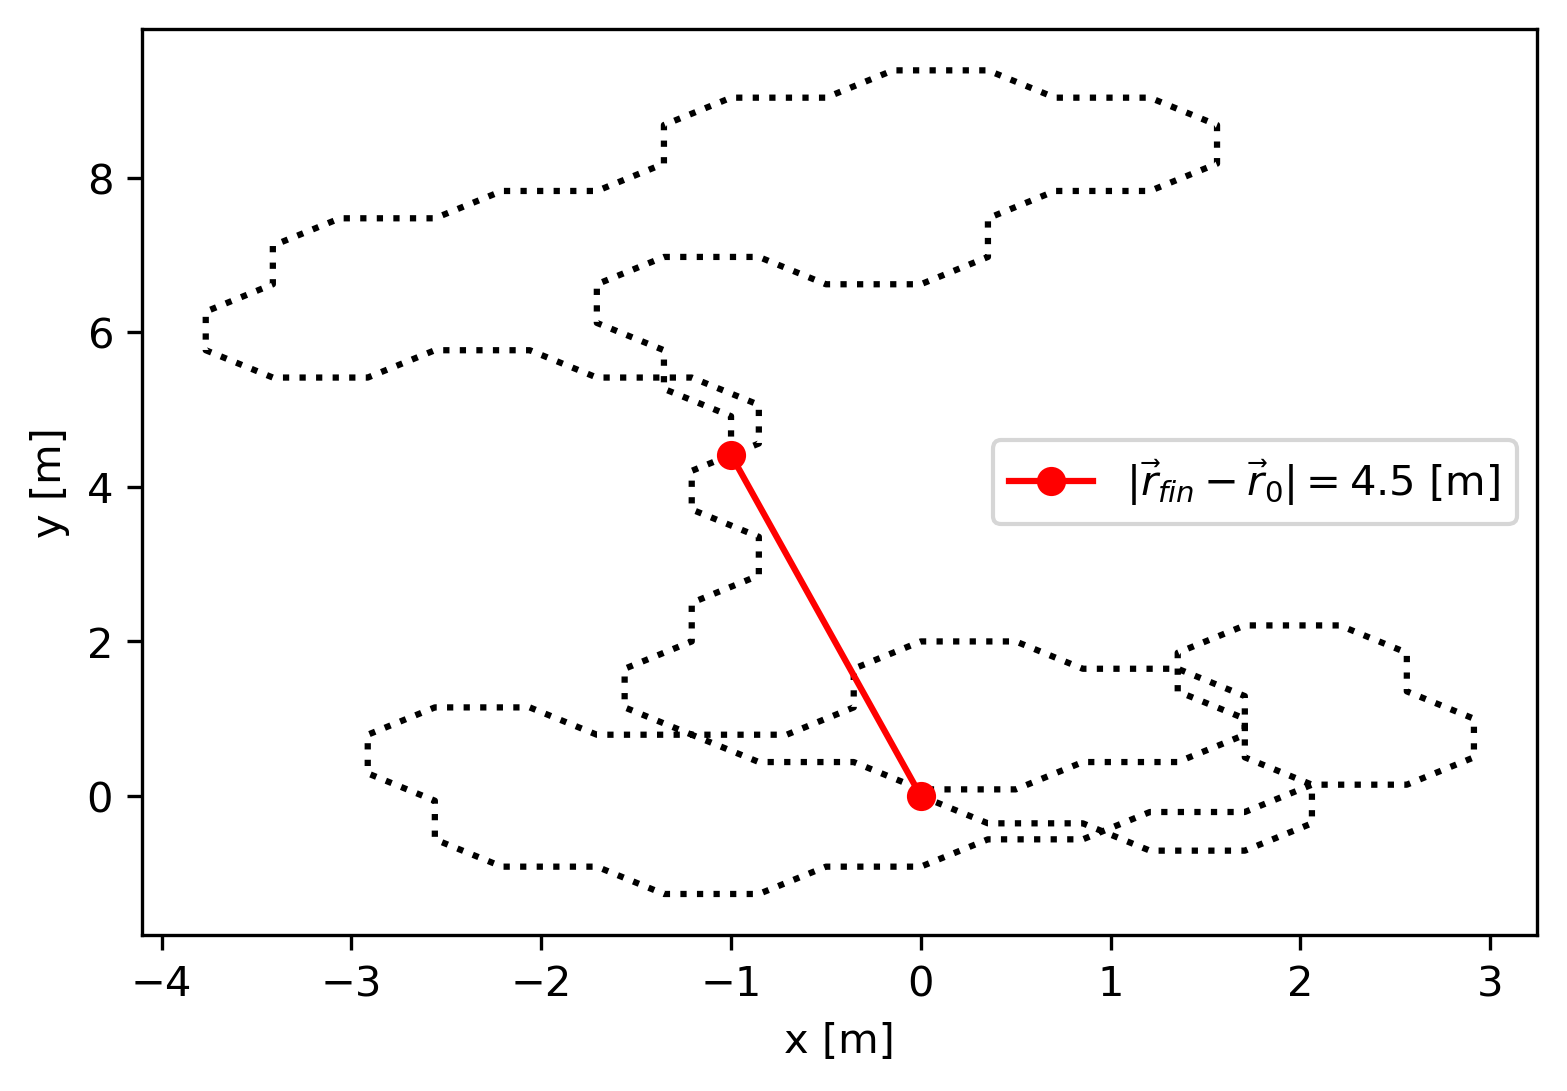

In [3]:
_ = camino_aleatorio()

## 3. Ensamble
### 3.1. Obtención del ensamble y los primeros momentos

In [4]:
num_sistemas = 500
ensamble = [camino_aleatorio(plot=False) for s in range(num_sistemas)]
ensamble_mean = np.mean(ensamble)
ensamble_std  = np.std(ensamble)

### 3.2. Gráfica de recorrido para los sistemas del ensamble

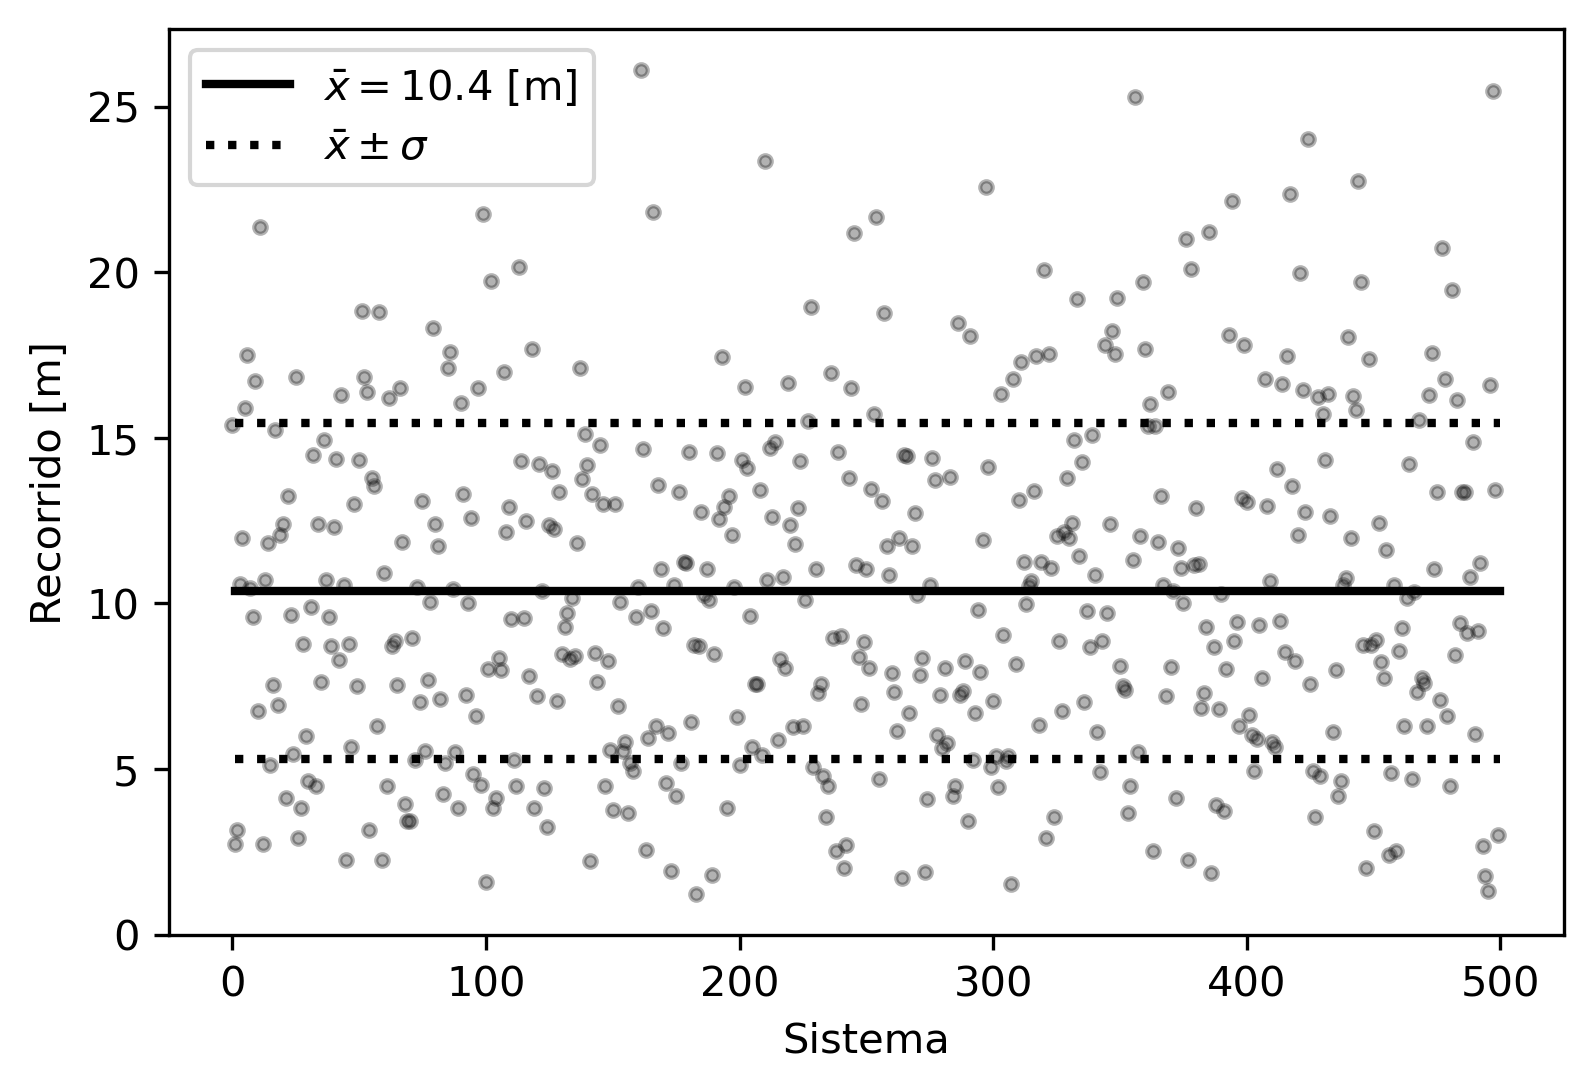

In [5]:
dpi = 300
plt.figure(dpi=dpi)
plt.plot(ensamble, '.k', alpha=0.3)
plt.plot([1, num_sistemas], 2*[ensamble_mean], 
            'k', lw=2, label=r'$\bar{x}=%0.1f$ [m]' % ensamble_mean)
plt.plot([1, num_sistemas], 2*[ensamble_mean-ensamble_std], ':k', label=r'$\bar{x}\pm\sigma$', lw=2)
plt.plot([1, num_sistemas], 2*[ensamble_mean+ensamble_std], ':k', lw=2)
plt.xlabel('Sistema')
plt.ylabel('Recorrido [m]')
_ = plt.legend()

### 3.3. Histograma

In [ ]:
fact = np.math.factorial
def W(n, p, N=):
    return fact()

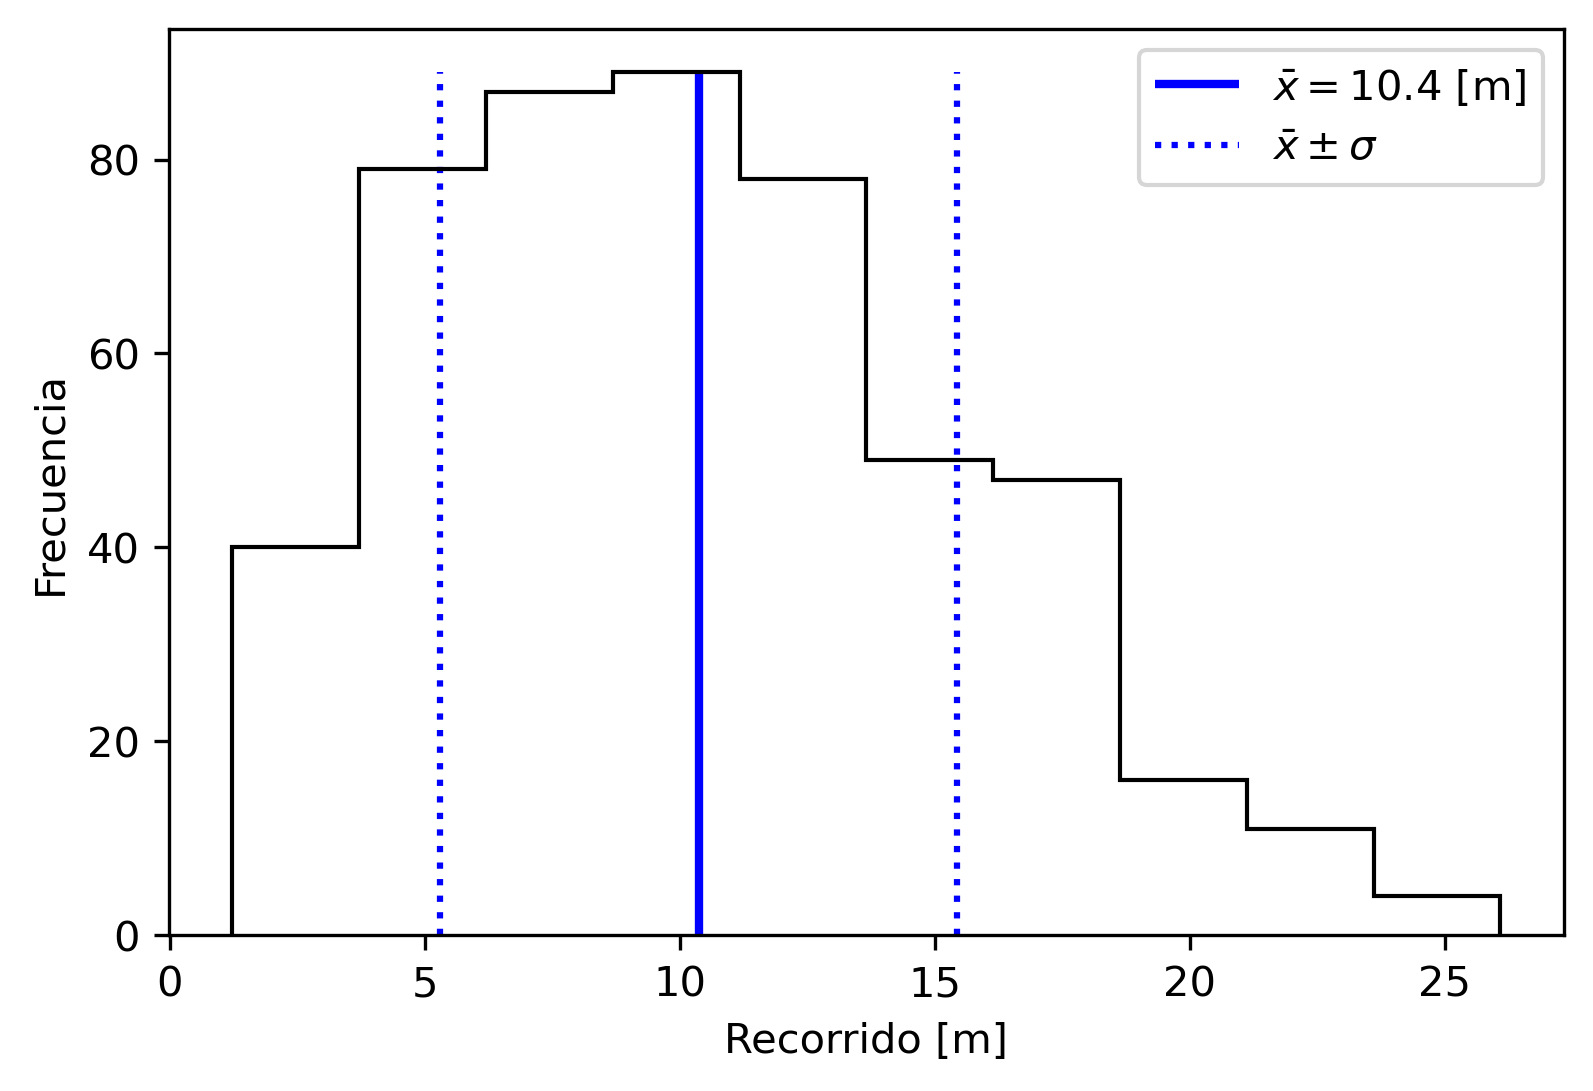

In [9]:

plt.figure(dpi=dpi)
y, x, fig = plt.hist(ensamble, bins=10, density=False, histtype='step', color='k')
plt.vlines(ensamble_mean, 0, max(y), color='b', lw=2, label=r'$\bar{x}=%0.1f$ [m]' % ensamble_mean)
plt.vlines(ensamble_mean+ensamble_std, 0, max(y), ls=':', color='b',label=r'$\bar{x}\pm\sigma$')
plt.vlines(ensamble_mean-ensamble_std, 0, max(y), ls=':', color='b')
plt.xlabel('Recorrido [m]')
plt.ylabel('Frecuencia')
_ = plt.legend()

End!